In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
Factor=(0.3894*1e6)
def Get_average(value):
    sum_mean = 0
    sum_sigma = 0
    for i in range(len(value)):
        sum_mean += value[i]
        
    return sum_mean/len(value)

In [3]:
column_names = ['check','exc_integ','exc','i','Eb','BP','TP','x','y','z','pt2','phih','phis','k0','born','bornv','amm','ammv','nrad','ir','irv','rad','radv','f','fv','fe','fev','rad2','rad2v','rad2e','rad2ev','add','addv','adde','addev','unknow1','unknow2','unknow3']
df_10_Cpp = pd.read_csv('inputs/Get_exc10_cleanxs_morephih.txt',delim_whitespace=True,names=column_names)

print(len(df_10_Cpp))
df_10_Cpp.head()

64


,check,exc_integ,exc,i,Eb,BP,TP,x,y,z,...,rad2v,rad2e,rad2ev,add,addv,adde,addev,unknow1,unknow2,unknow3
0,check,exc_integ,0.000050,0,10.65,U,T,0.199,0.15,0.495,...,err,0,rad,2.142260e-09,err,2.711240e-11,add,NaN,err,2.711240e-11
1,check,exc_integ,0.000033,0,10.65,U,T,0.199,0.15,0.495,...,err,0,rad,1.998420e-09,err,2.460240e-11,add,NaN,err,2.460240e-11
2,check,exc_integ,0.000019,0,10.65,U,T,0.199,0.15,0.495,...,err,0,rad,1.738380e-09,err,2.782760e-11,add,NaN,err,2.782760e-11
3,check,exc_integ,0.000010,0,10.65,U,T,0.199,0.15,0.495,...,err,0,rad,1.455100e-09,err,2.834290e-11,add,NaN,err,2.834290e-11
4,check,exc_integ,0.000005,0,10.65,U,T,0.199,0.15,0.495,...,err,0,rad,1.213900e-09,err,2.423580e-11,add,NaN,err,2.423580e-11


In [4]:
df_10_Cpp_pt2_1 = df_10_Cpp[df_10_Cpp['pt2']==0.015]
print(len(df_10_Cpp_pt2_1))
df_10_Cpp_pt2_1.head()

63


,check,exc_integ,exc,i,Eb,BP,TP,x,y,z,...,rad2v,rad2e,rad2ev,add,addv,adde,addev,unknow1,unknow2,unknow3
0,check,exc_integ,0.000050,0,10.65,U,T,0.199,0.15,0.495,...,err,0,rad,2.142260e-09,err,2.711240e-11,add,NaN,err,2.711240e-11
1,check,exc_integ,0.000033,0,10.65,U,T,0.199,0.15,0.495,...,err,0,rad,1.998420e-09,err,2.460240e-11,add,NaN,err,2.460240e-11
2,check,exc_integ,0.000019,0,10.65,U,T,0.199,0.15,0.495,...,err,0,rad,1.738380e-09,err,2.782760e-11,add,NaN,err,2.782760e-11
3,check,exc_integ,0.000010,0,10.65,U,T,0.199,0.15,0.495,...,err,0,rad,1.455100e-09,err,2.834290e-11,add,NaN,err,2.834290e-11
4,check,exc_integ,0.000005,0,10.65,U,T,0.199,0.15,0.495,...,err,0,rad,1.213900e-09,err,2.423580e-11,add,NaN,err,2.423580e-11


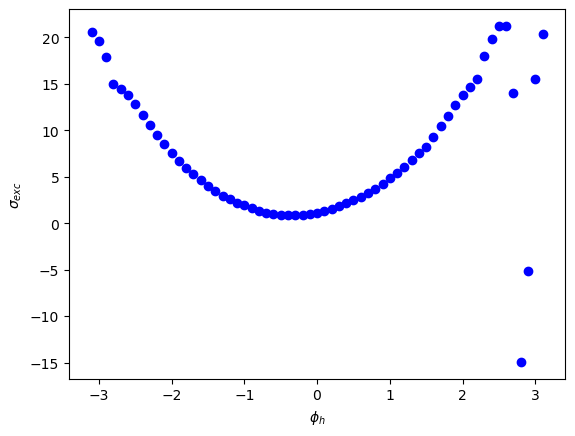

In [5]:
plt.plot(df_10_Cpp_pt2_1['phih'],Factor*df_10_Cpp_pt2_1['exc'],'bo')
plt.xlabel(r'$\phi_h$')
plt.ylabel(r'$\sigma_{exc}$')
#plt.ylim(0,25)
plt.savefig('results/exc_xs_phih.pdf')

In [6]:
exc_xs = df_10_Cpp_pt2_1['exc']
phihs = df_10_Cpp_pt2_1['phih']
exc_siver = []
sum_exc_siver = 0
sum_exc=0
dphih = 2*np.pi/len(phihs)
for i in range(len(phihs)):
    phih = phihs[i]
    i_exc_xs = exc_xs[i]
    i_exc_siver = (i_exc_xs*np.sin(phih)*np.cos(1)-np.cos(phih)*np.sin(1)*i_exc_xs)*dphih
    i_sum_exc=i_exc_xs*dphih
    sum_exc+=i_sum_exc
    sum_exc_siver +=i_exc_siver
print(Factor*sum_exc_siver)
print(Factor*sum_exc)
print(sum_exc_siver/(sum_exc))
#integ_phih = Get_average(exc_xs)
#print(integ_phih)


21.960554617385334
47.11037722741315
0.46615110958200234
